# Data Description

# Importing the Libraries

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the dataset
df=pd.read_csv("BaseballCaseStudy.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.shape

(30, 17)

In [5]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

As you can see that it is not clear with these shortforms, what is which column and what is the dependence, So we replace this column names with its full forms


In [6]:
df.columns='Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors'.split(',')

In [7]:
df.head()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [8]:
df.dtypes

Wins                          int64
Runs                          int64
At_Bats                       int64
Hits                          int64
Doubles                       int64
Triples                       int64
Homeruns                      int64
Walks                         int64
Strikeouts                    int64
Stolen_Bases                  int64
Runs_Allowed                  int64
Earned_Runs                   int64
Earned_Run_Average_(ERA)    float64
Complete_Game                 int64
Shutouts                      int64
Saves                         int64
Errors                        int64
dtype: object

All columns are int datatype, except Earned_Run_Average_(ERA) which is of float data type

### Checking For Missing Values in Dataset

In [9]:
df.isna().sum()

Wins                        0
Runs                        0
At_Bats                     0
Hits                        0
Doubles                     0
Triples                     0
Homeruns                    0
Walks                       0
Strikeouts                  0
Stolen_Bases                0
Runs_Allowed                0
Earned_Runs                 0
Earned_Run_Average_(ERA)    0
Complete_Game               0
Shutouts                    0
Saves                       0
Errors                      0
dtype: int64

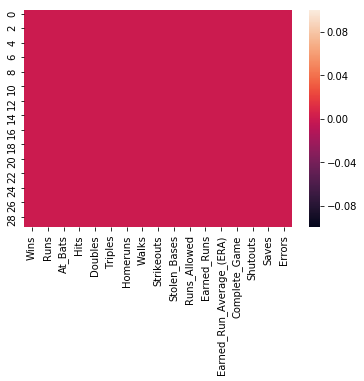

In [10]:
sns.heatmap(df.isna())

We see that there is no null values in dataset

In [11]:
df.describe()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


We see that there is huge difference in ranges of data between different columns. So we need to Scale down the data, Which we will do later in the code

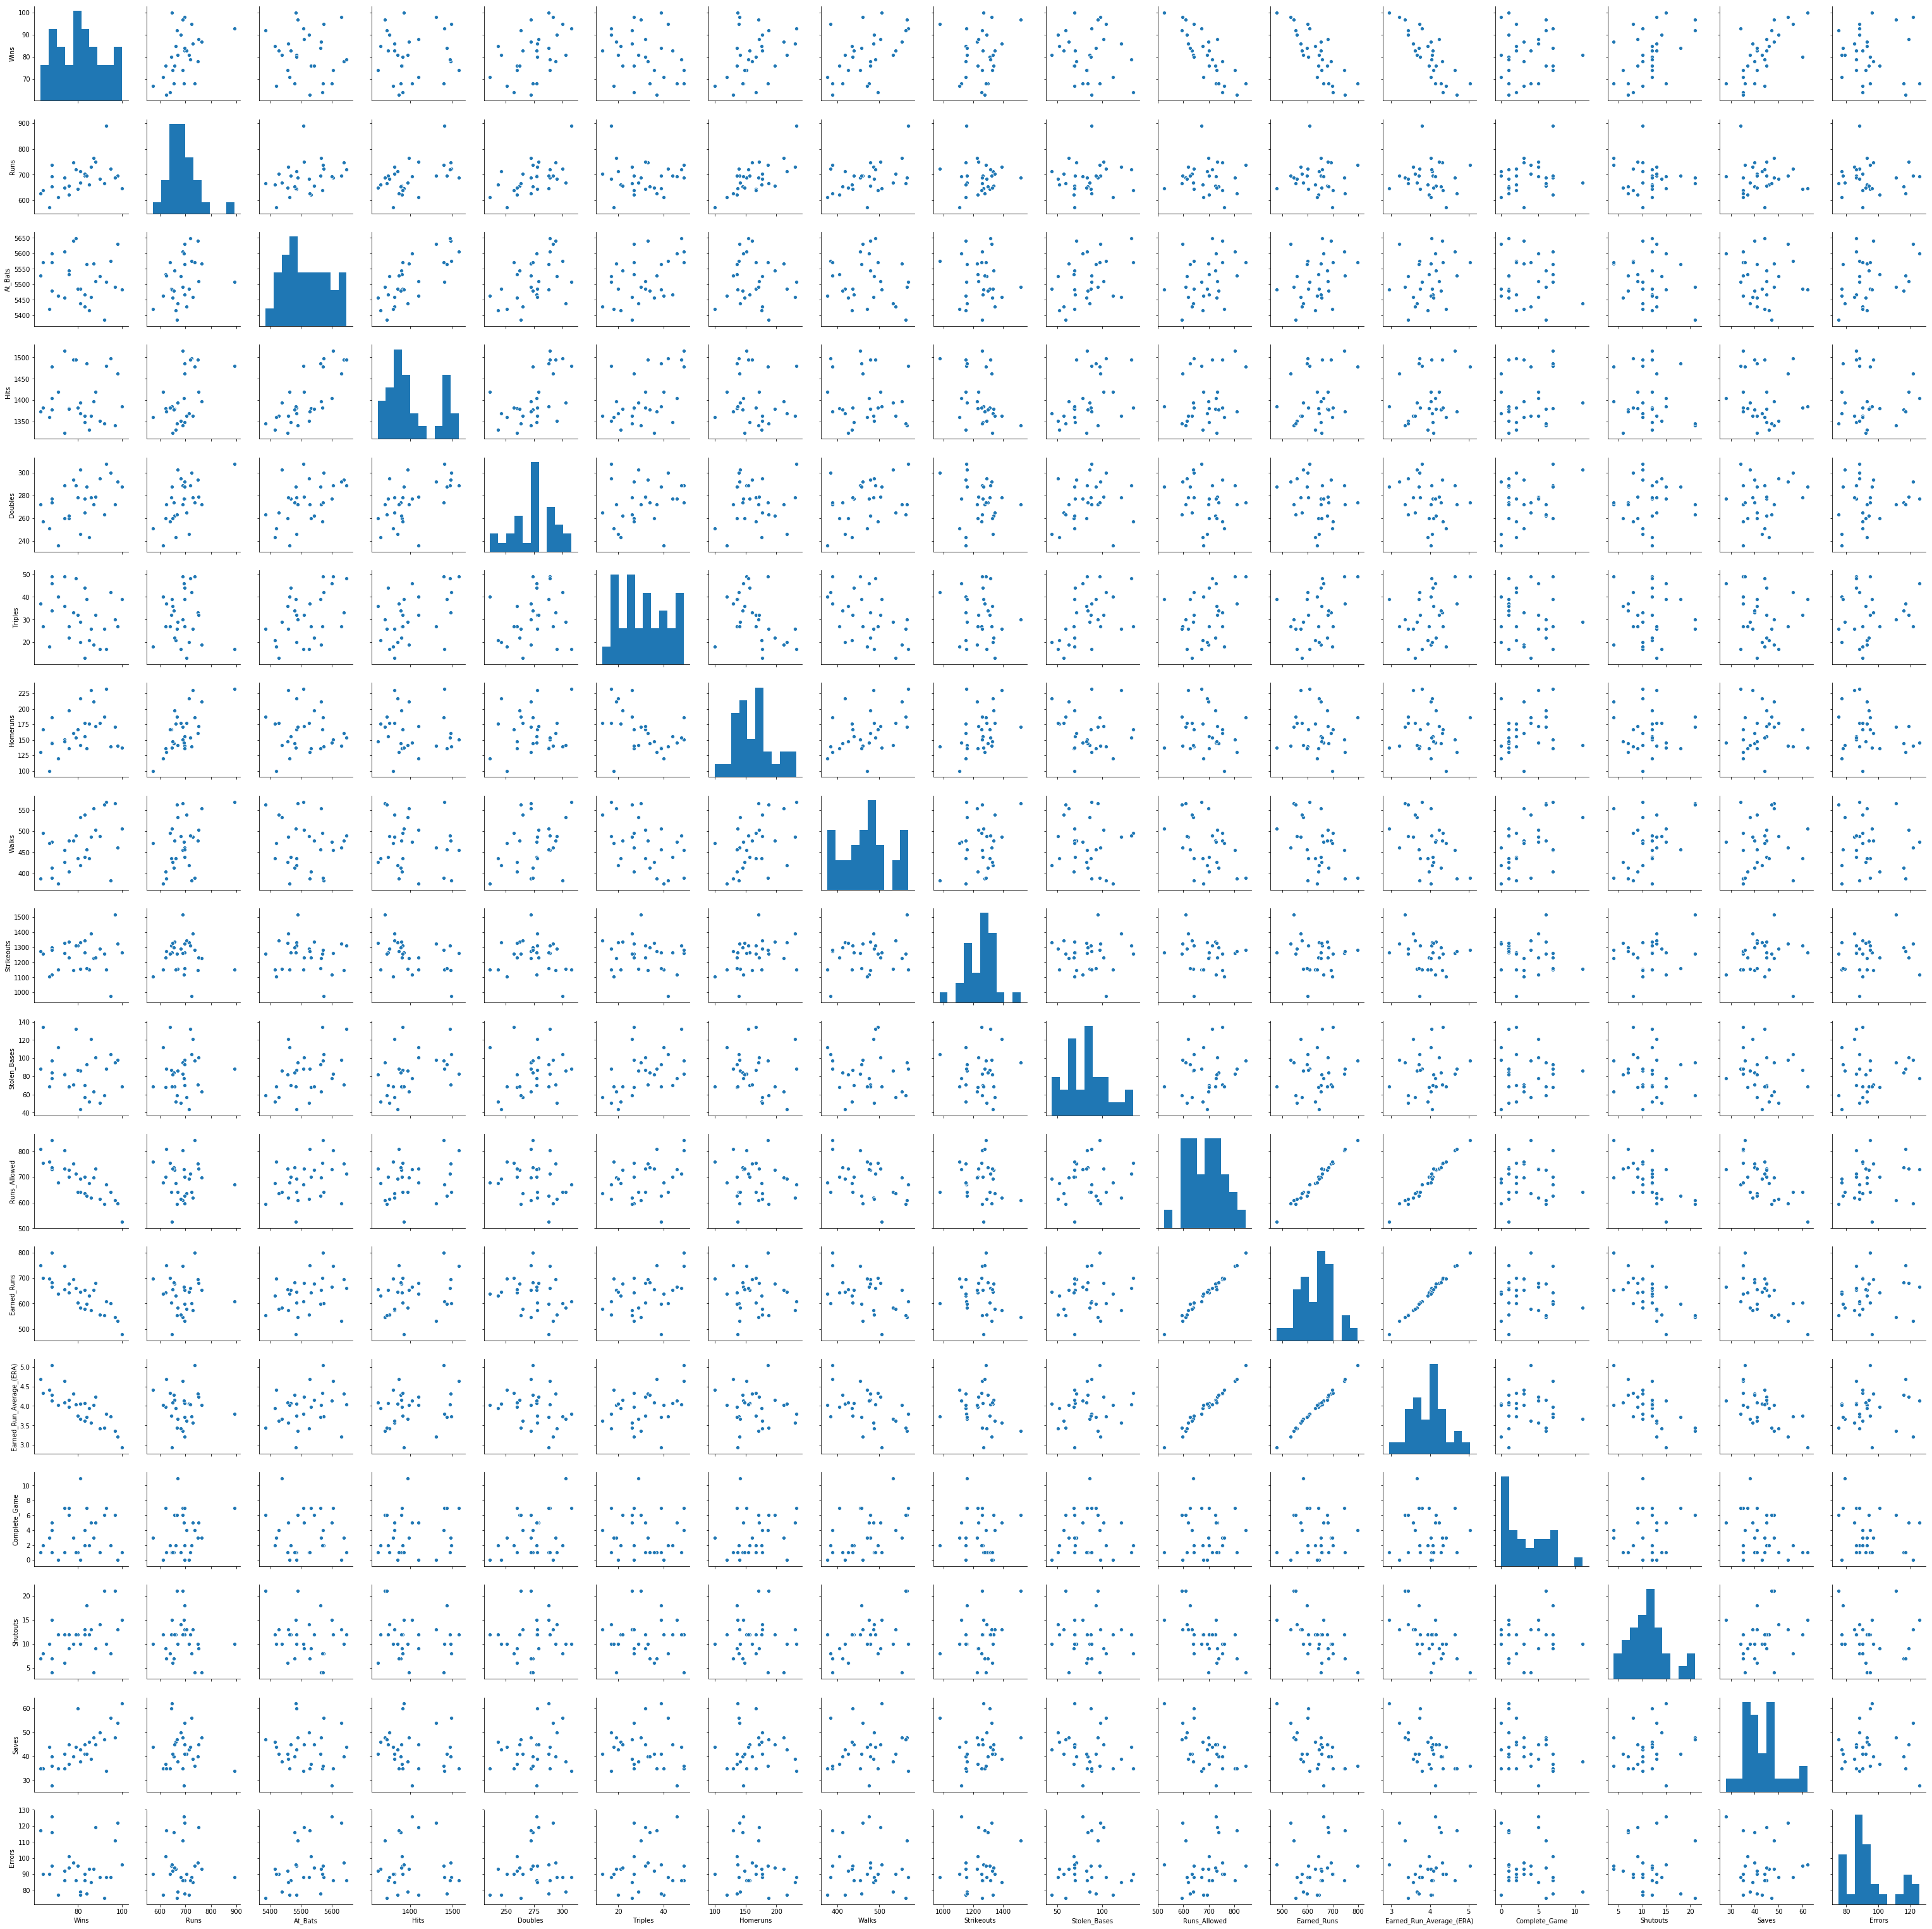

In [12]:
sns.pairplot(df)

## Correlation

In [13]:
df.corr()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At_Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen_Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


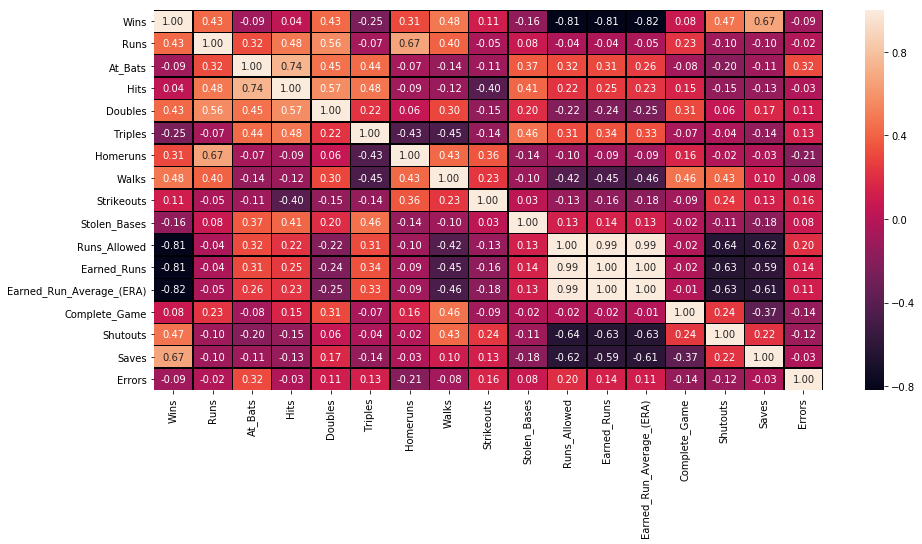

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor="black",fmt='0.2f')

## Checking For Outliers

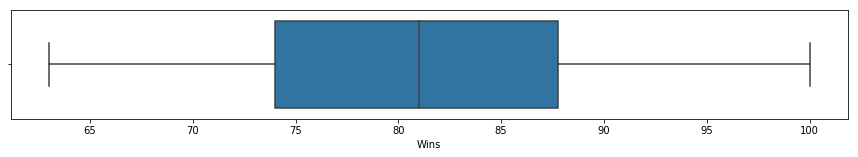

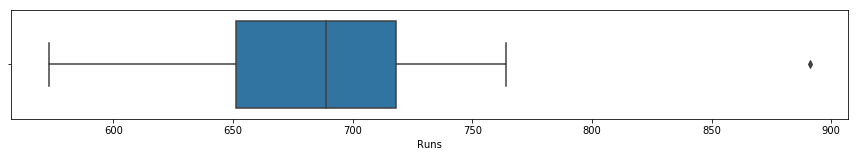

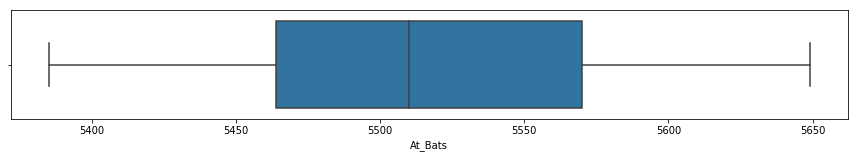

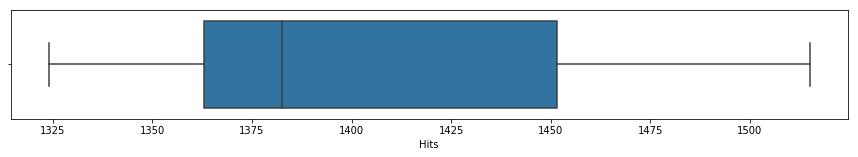

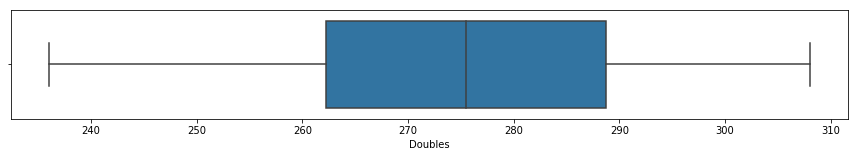

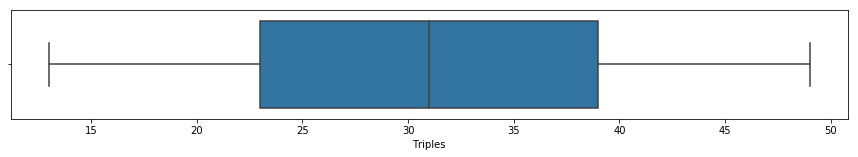

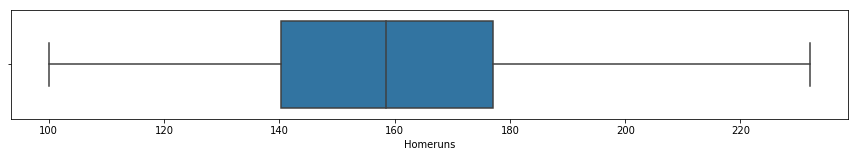

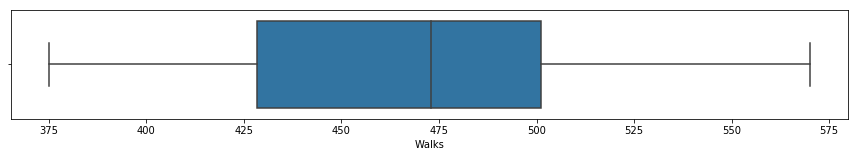

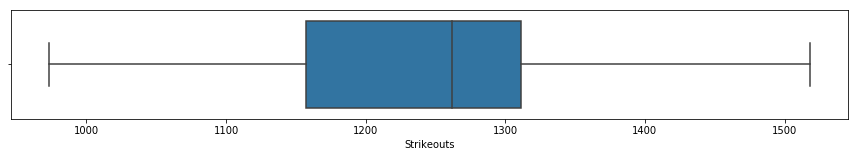

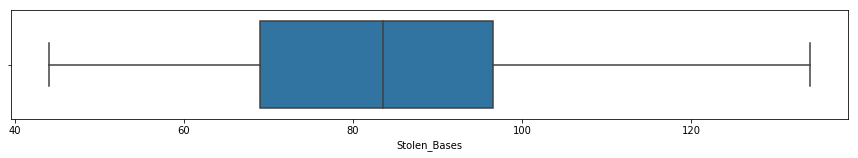

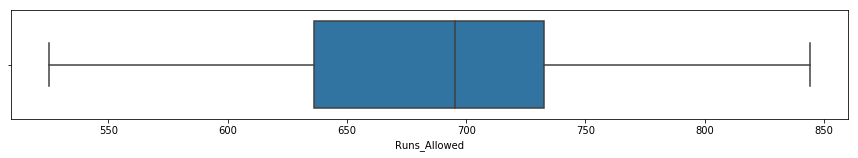

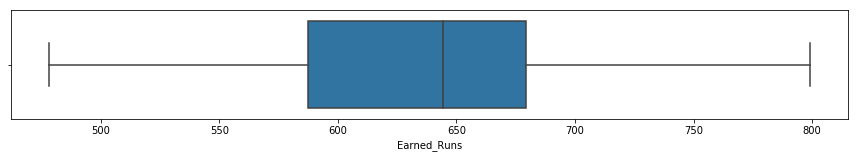

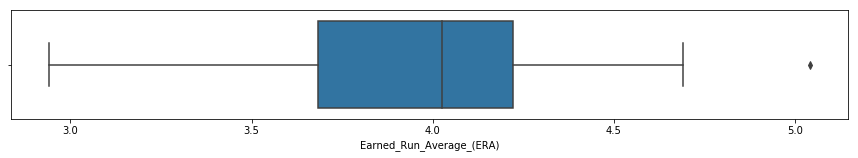

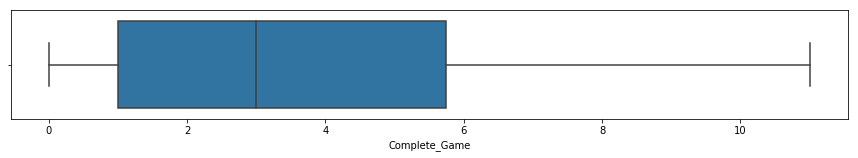

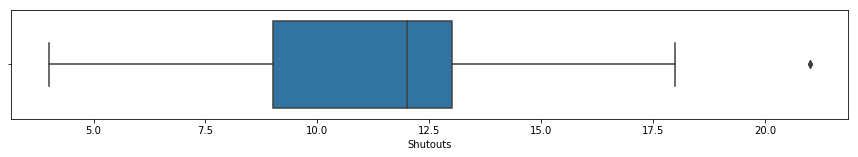

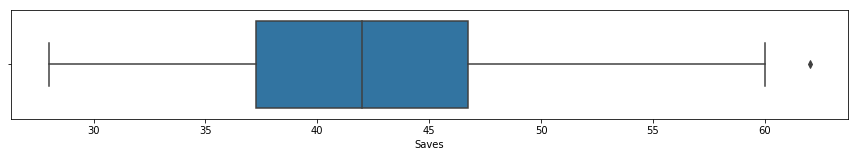

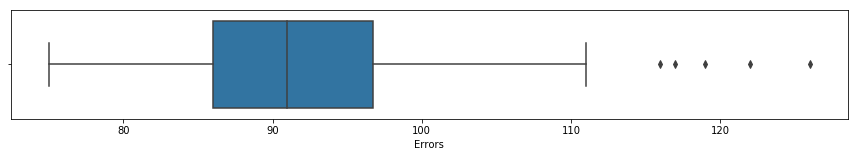

In [15]:
# plotting a box plt for each of the feature seperately:
for cols in df:
    plt.figure(figsize=(15,2))
    sns.boxplot(df[cols])
    plt.show()

As we can see outliers are present in Errors, Saves, Shutouts, Earned_Run_Average & Runs

In [16]:
# To Remove these outliers we use zscore technique here
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(30, 17)

In [17]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [18]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(30, 17)
(29, 17)


In [19]:
# Percentage Loss In Data
loss_percent=((30-29)/30)*100
loss_percent

3.3333333333333335

As Loss in dataset is only 3% therefore we will now use the new_data

## Check Skewness in Data

In [20]:
df_new.skew()

Wins                        0.119013
Runs                       -0.215364
At_Bats                     0.169573
Hits                        0.783772
Doubles                    -0.335304
Triples                     0.090124
Homeruns                    0.450862
Walks                       0.151193
Strikeouts                 -0.233815
Stolen_Bases                0.494966
Runs_Allowed                0.018155
Earned_Runs                 0.018461
Earned_Run_Average_(ERA)    0.016693
Complete_Game               0.854980
Shutouts                    0.526943
Saves                       0.627480
Errors                      0.840271
dtype: float64

Considering skewness limit to be around +/- 0.65 .
Here we see that no large skewness is present in data so we will avoid removing skewness from data

## Splitting independent and target variables in x and y

In [21]:
x=df_new.drop("Wins",axis=1)
y=df_new["Wins"]

As from above data we know that there is huge difference in ranges of data between different columns. So we need to Scale down the data

In [22]:
#Scaling the Data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)


# Finding Best Random State

In [23]:
max_r2=0
maxRs=0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    r2_score1=r2_score(y_test,pred_test)
    if r2_score1>max_r2:
        max_r2=r2_score1
        maxRs=i
print("Best r2_score is ", max_r2,"on Random_State",maxRs)

Best r2_score is  0.8592555824296149 on Random_State 30


Best r2_score is Obtained at Random State =30 , so we will use that random state to train our model

### Performing Train-Test Split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)

# Training Our Model

In [25]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.model_selection import cross_val_score

lr=LinearRegression()
ri=Ridge()
la=Lasso()
dtc=DecisionTreeRegressor()
svr=SVR()
rf=RandomForestRegressor()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()

In [26]:
model=[lr,ri,la,dtc,svr,rf,gbr,abr]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Mean Absolute error: of',m)
    mae=mean_absolute_error(y_test,pred)
    print(mae)
    print('Mean Squared error: of',m)
    mse=mean_squared_error(y_test,pred)
    print(mse)
    print('Root Mean Squared error: of',m)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print(rmse)
    print('r2 score: of',m)
    r2score=r2_score(y_test,pred)
    print(r2score)
    score=cross_val_score(m,x,y,cv=5)
    crossval=score.mean()
    print("Cross Validation Score:",crossval)
    print("Difference Between r2_score and CrossValidation Score:",abs(r2score-crossval))
    print("\n")

Mean Absolute error: of LinearRegression()
3.6785304166996853
Mean Squared error: of LinearRegression()
20.157728249802933
Root Mean Squared error: of LinearRegression()
4.489735877510272
r2 score: of LinearRegression()
0.8592555824296149
Cross Validation Score: 0.03762866049631479
Difference Between r2_score and CrossValidation Score: 0.8216269219333001


Mean Absolute error: of Ridge()
3.628646089226398
Mean Squared error: of Ridge()
18.36936886262998
Root Mean Squared error: of Ridge()
4.285950170339126
r2 score: of Ridge()
0.8717421879257798
Cross Validation Score: 0.33747787690695674
Difference Between r2_score and CrossValidation Score: 0.5342643110188231


Mean Absolute error: of Lasso()
2.565514044732687
Mean Squared error: of Lasso()
12.833229199550132
Root Mean Squared error: of Lasso()
3.5823496757784734
r2 score: of Lasso()
0.9103963826253287
Cross Validation Score: 0.41522524523739096
Difference Between r2_score and CrossValidation Score: 0.4951711373879378


Mean Absolute

We See that difference between Lasso and its cross validation score is minimum so we will consider Lasso as our model

# HyperParameter Tuning

In [27]:
from sklearn.model_selection import GridSearchCV
alphas = np.array([5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01,0.001, 0.0001, 0 ])
grid_la = GridSearchCV(estimator=la, param_grid=dict(alpha=alphas))
grid_la.fit(x_train,y_train)
print(grid_la.best_estimator_.alpha)
print(grid_la.best_score_)
#pred_grid_la=grid_la.predict(x_test)
#r2score=r2_score(y_test,pred_grid_la)
#print(r2score)


1.0
0.5831285392373518


In [30]:
best_model = Lasso(alpha=1.0)
best_model.fit(x_train,y_train)
pred_la=best_model.predict(x_test)
r2score=r2_score(y_test,pred_la)
print(r2score)

0.9103963826253287


# Saving the Best Model

In [31]:
# SAVING THE BEST MODEL:
import joblib
joblib.dump(best_model,'BaseBall.obj')

['BaseBall.obj']